In [137]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(42)
import pandas as pd

num_training_points = 2000
num_features = 5
X = np.random.randn(num_training_points, num_features)
y = np.random.randn(num_training_points)
print("Shape of X:", X.shape)


Shape of X: (2000, 5)


In [138]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
model = LinearRegression().fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
MSE_test = mean_squared_error(ytest, y_pred)

y_train_pred = model.predict(Xtrain)
MSE_train = mean_squared_error(ytrain, y_train_pred)
print("Test MSE:", MSE_test)
print("Training MSE:", MSE_train)

Test MSE: 0.9055096896297914
Training MSE: 1.002119579105167


In [139]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5)
model = LinearRegression().fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
MSE_test = mean_squared_error(ytest, y_pred)

y_train_pred = model.predict(Xtrain)
MSE_train = mean_squared_error(ytrain, y_train_pred)
print("Test MSE:", MSE_test)
print("Training MSE:", MSE_train)

Test MSE: 0.968715932793954
Training MSE: 1.0039289208749305


In [140]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.05)
model = LinearRegression().fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
MSE_test = mean_squared_error(ytest, y_pred)

y_train_pred = model.predict(Xtrain)
MSE_train = mean_squared_error(ytrain, y_train_pred)
print("Test MSE:", MSE_test)
print("Training MSE:", MSE_train)

Test MSE: 0.8707320758580904
Training MSE: 0.9884243018596436


## A 95% training data and 5% test data split gives the most accurate result from the above.

In [141]:
from sklearn.model_selection import LeaveOneOut
X = np.arange(0, 1, 0.05).reshape(-1, 1)
y = 10 * X + np.random.normal(0.0, 1.0, X.size).reshape(-1, 1)
loo = LeaveOneOut()
mse_values = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
mean_mse = np.mean(mse_values)
print('Mean Mean Squared Error:', mean_mse)

Mean Mean Squared Error: 1.3157964957708657


In [142]:
mse_values = pd.DataFrame(mse_values)

In [143]:
mse_values.describe()

,0
count,20.000000
mean,1.315796
std,1.339530
min,0.011963
25%,0.391033
50%,1.023179
75%,1.528878
max,4.817354


In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.arange(0,1,0.05).reshape(-1, 1)
model = LinearRegression()
y = 10*X + np.random.normal(0.0,1.0,X.size).reshape(-1,1)
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))


[-0.34494304 -0.5531821  -0.82717612  0.53384342  0.22869054]
Accuracy: -0.19 (+/- 0.50)


In [145]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
MSEs = []
for train, test in kf.split(X):
    model = LinearRegression().fit(X[train], y[train])
    ypred = model.predict(X[test])
    from sklearn.metrics import mean_squared_error
    print('intercept %f, slope %f, square error%f'%(model.intercept_,model.coef_,mean_squared_error(y[test],ypred)))
    MSEs.append(mean_squared_error(y[test],ypred))
print("The average test MSE:", np.mean(MSEs))

intercept -0.614353, slope 10.453811, square error1.079446
intercept -0.050320, slope 9.660675, square error0.785001
intercept 0.171109, slope 9.588335, square error1.158433
intercept 0.018892, slope 9.356937, square error0.664995
intercept 0.101355, slope 9.132329, square error0.619148
The average test MSE: 0.8614045806462587


In [146]:
MSEs = pd.DataFrame(MSEs)
MSEs.describe()

,0
count,5.000000
mean,0.861405
std,0.244372
min,0.619148
25%,0.664995
50%,0.785001
75%,1.079446
max,1.158433


In [147]:
from ISLP import load_data
Auto = load_data("Auto")
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [148]:

y = Auto["mpg"]
X = Auto[["horsepower"]] ##, "cylinders", "displacement", "weight", "acceleration", "year", "origin"]]

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)


In [149]:
model = LinearRegression().fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
MSE_test = mean_squared_error(ytest, y_pred)
print("Test MSE:", MSE_test)

Test MSE: 18.82449639724798


In [150]:

kf = KFold(n_splits=5)
MSEs = []
for train, test in kf.split(X):
    model = LinearRegression().fit(X.iloc[train], y.iloc[train])
    y_pred = model.predict(X.iloc[test])
    mse = mean_squared_error(y.iloc[test], y_pred)
    print('Intercept: %f, Coefficients: %s, Test MSE: %f' % (model.intercept_, model.coef_, mse))
    MSEs.append(mse)

print("The average test MSE:", np.mean(MSEs))

Intercept: 42.464063, Coefficients: [-0.18083985], Test MSE: 25.017520
Intercept: 41.526855, Coefficients: [-0.16745933], Test MSE: 27.254101
Intercept: 40.670136, Coefficients: [-0.16005759], Test MSE: 18.034163
Intercept: 39.008642, Coefficients: [-0.15110405], Test MSE: 20.347679
Intercept: 35.954455, Coefficients: [-0.13230695], Test MSE: 66.581607
The average test MSE: 31.447014088557513


In [151]:
import statsmodels.api as sm
degree = 2
X_poly = np.column_stack([X**i for i in range(1, degree + 1)])
X_poly = sm.add_constant(X_poly)
model = sm.OLS(y,X_poly).fit()


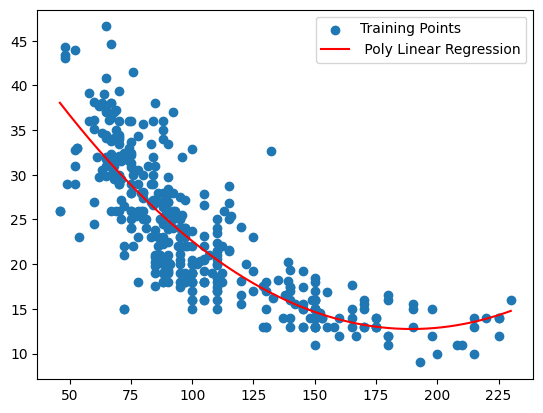

In [153]:
Xtest = np.linspace(Auto['horsepower'].min(),Auto['horsepower'].max(),num=1000)
Xtest = np.column_stack([Xtest**i for i in range(1, degree + 1)])
Xtest = sm.add_constant(pd.DataFrame(Xtest))
ypreds = model.predict(Xtest)
plt.scatter(Auto['horsepower'],Auto['mpg'])
plt.plot(Xtest[0],ypreds, c='red')
plt.legend(['Training Points',' Poly Linear Regression'])
plt.show()